In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import torch
from evo.dataset import FastaDataset
from plaid.datasets import MetadataParser, NUM_FUNCTION_CLASSES, NUM_ORGANISM_CLASSES
import numpy as np
import matplotlib.pyplot as plt

val_fasta = '/data/lux70/data/pfam/val.fasta'
train_fasta = '/data/lux70/data/pfam/train.fasta'

ds = FastaDataset(train_fasta)
parser = MetadataParser()

100%|██████████| 9.03G/9.03G [00:47<00:00, 206MB/s]
100%|██████████| 9.03G/9.03G [01:05<00:00, 148MB/s] 


## Parse FASTA to DataFrame

In [66]:
import random
random.seed(42)
np.random.seed(42)

indices = np.arange(len(ds))[np.random.rand(len(ds)) < 0.01]
print(indices.shape)

(441473,)


In [77]:
all_sequences = []

from tqdm.auto import trange, tqdm
import math

for i in indices:
    header, sequence = ds[i]
    if (len(sequence) <= 520) and (len(sequence) >= 64):
        all_sequences.append(sequence)

In [78]:
def check_if_all_lists_above_num(d, num):
    for v in d.values():
        if len(v) < num:
            return False
    return True

In [81]:
lengths = np.arange(64, 521, 8)

outdict = dict(zip(lengths, [[] for _ in range(len(lengths))]))
outdict.pop(520)

print(outdict)
print(lengths)

for s in all_sequences:
    good = check_if_all_lists_above_num(outdict, 64)
    if good:
        break
    
    for i in range(len(lengths) - 1):
        if (len(s) > lengths[i]) and (len(s) < lengths[i+1]):
            if len(outdict[lengths[i]]) < 64:
                outdict[lengths[i]].append(s)
        else:
            pass

{64: [], 72: [], 80: [], 88: [], 96: [], 104: [], 112: [], 120: [], 128: [], 136: [], 144: [], 152: [], 160: [], 168: [], 176: [], 184: [], 192: [], 200: [], 208: [], 216: [], 224: [], 232: [], 240: [], 248: [], 256: [], 264: [], 272: [], 280: [], 288: [], 296: [], 304: [], 312: [], 320: [], 328: [], 336: [], 344: [], 352: [], 360: [], 368: [], 376: [], 384: [], 392: [], 400: [], 408: [], 416: [], 424: [], 432: [], 440: [], 448: [], 456: [], 464: [], 472: [], 480: [], 488: [], 496: [], 504: [], 512: []}
[ 64  72  80  88  96 104 112 120 128 136 144 152 160 168 176 184 192 200
 208 216 224 232 240 248 256 264 272 280 288 296 304 312 320 328 336 344
 352 360 368 376 384 392 400 408 416 424 432 440 448 456 464 472 480 488
 496 504 512 520]


In [83]:
all_seqs = np.concatenate([np.array(v) for v in outdict.values()])

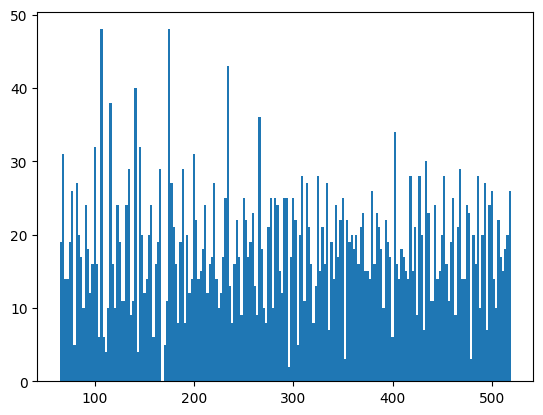

In [96]:
all_lengths = [len(s) for s in all_seqs]
_ = plt.hist(all_lengths,bins=200)

In [92]:
from plaid.utils import write_to_fasta
from pathlib import Path

root_out_dir = Path("/data/lux70/plaid/artifacts/natural_binned_lengths/")

for length, sequences in outdict.items():
    outpath = root_out_dir / f"binstart{str(length)}" / "generated" / "sequences.fasta"
    if not outpath.parent.exists():
        outpath.parent.mkdir(parents=True)
    
    write_to_fasta(sequences,outpath)

Wrote 64 sequences to /data/lux70/plaid/artifacts/natural_binned_lengths/binstart64/generated/sequences.fasta.
Wrote 64 sequences to /data/lux70/plaid/artifacts/natural_binned_lengths/binstart72/generated/sequences.fasta.
Wrote 64 sequences to /data/lux70/plaid/artifacts/natural_binned_lengths/binstart80/generated/sequences.fasta.
Wrote 64 sequences to /data/lux70/plaid/artifacts/natural_binned_lengths/binstart88/generated/sequences.fasta.
Wrote 64 sequences to /data/lux70/plaid/artifacts/natural_binned_lengths/binstart96/generated/sequences.fasta.
Wrote 64 sequences to /data/lux70/plaid/artifacts/natural_binned_lengths/binstart104/generated/sequences.fasta.
Wrote 64 sequences to /data/lux70/plaid/artifacts/natural_binned_lengths/binstart112/generated/sequences.fasta.
Wrote 64 sequences to /data/lux70/plaid/artifacts/natural_binned_lengths/binstart120/generated/sequences.fasta.
Wrote 64 sequences to /data/lux70/plaid/artifacts/natural_binned_lengths/binstart128/generated/sequences.fast